##  Capstone Project - The Battle of Neighborhoods (Week 1)

#### INTRODUCTION/BUISNESS PROBLEM

Each and evey city has it own way of creation. Some cities are developed, some are developing and some are at the inital stage.The buildings,population, various restaurants, transportation,various shops,various cusines,demographics,environments and culture are different from one another.I am going to analyse the cusine around the neighborhoods of city in order to determine that how popular those restarants are. They can be compared in respect to the place where they can eat,live and how diverse are both the places. Mostly, I will be taking environments,restaurants,ratings,people reviews/tips about the place and dishes  while comparing. The target audience will the food consumers who prefers particular cusine more.

#### DATA SECTION

*This section deal with the primary data set which we will be using in the project.*

The data which we will using for the project is that **New York Data Set**.Both the data sets cosists of 3 columns which we will be using they are: 
1. Locations 
2. Neighborhoods 
4. Latitudes 
5. Longitudes 
6. Boroughs

Foursquare API will be used for the analyzation phrase. It is used to analyze the nearby restaurants & cusines of the neighborhoodsand calculate the frequency of people been to these places inorder to see how popular and important these places are.

Data will be well sorted and cleaned for the processing and methodology pharse.

Follwing is the link of the dataset which we will be using in this project: https://cocl.us/new_york_dataset.

#### STEP 1: Importing the required Libraries 

In [13]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.


#### STEP 2: Defining Credentials

In [14]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'ZM20T51V1CKOV1N1GMBB44OZ55BTGTDXSQOWB3MHEXTYHV0B' # Foursquare ID
CLIENT_SECRET = 'UTTZFIVCADM4LTY2G3JAGADXM2ZZACW5HBLS5ZE4PSZCSRRZ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### STEP 3: Defining required functions 

In [15]:
def geo_loc(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [16]:
def venue(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    result_set = requests.get(url).json()
    venue_data=result_set['response']['groups'][0]['items']
    place_details=[]
    for row in venue_data:
        try:
            place_id=row['venue']['id']
            place_name=row['venue']['name']
            place_category=row['venue']['categories'][0]['name']
            place_details.append([place_id,place_name,place_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df_places = pd.DataFrame(place_details,columns=column_names)
    return df_places


In [17]:
def venue_details(place_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            place_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    place_details=[]
    try:
        place_id=venue_data['id']
        place_name=venue_data['name']
        place_likes=venue_data['likes']['count']
        place_rating=venue_data['rating']
        place_tips=venue_data['tips']['count']
        place_details.append([place_id,place_name,place_likes,place_rating,place_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df_ratings = pd.DataFrame(venue_details,columns=column_names)
    return df_ratings

In [18]:
def new_york_data():
    url='https://cocl.us/new_york_dataset'
    input_data=requests.get(url).json()
    # all data is present in features label
    features=input_data['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    newyork_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neigh_name = data['properties']['name']
        neigh_lat_lon = data['geometry']['coordinates']
        neigh_lat = neigh_lat_lon[1]
        neigh_lon = neigh_lat_lon[0]
        newyork_data = newyork_data.append({'Borough': borough,
                                          'Neighborhood': neigh_name,
                                          'Latitude': neigh_lat,
                                          'Longitude': neigh_lon}, ignore_index=True)
    return newyork_data

#### STEP 4: Input newyork data 

In [19]:
new_york = new_york_data()
new_york.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


We got our input data of new_york. This data frame contains Borough, their neighborhood and respective Latitute and Logitudes.

In [20]:
new_york.shape

(306, 4)

It contains 306 rows and 4 columns. As we can see there are 306 different neighborhood in this input data New york

#### STEP 5: Analyzing the input data 

Following we have created the bar plot inorder to analyze the insights from our input data

In [21]:
new_york_count=new_york.groupby('Borough')['Neighborhood'].count()

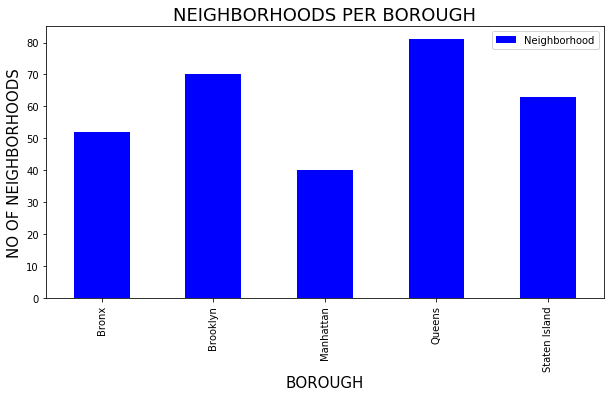

In [22]:
colour = "blue"
new_york_count.plot.bar(figsize=(10,5), color=colour)
plt.title('NEIGHBORHOODS PER BOROUGH', fontsize = 18)
plt.xlabel('BOROUGH', fontsize = 15)
plt.ylabel('NO OF NEIGHBORHOODS',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

As we can see above graph that, the place **"Queens"** in New York has the most number of neighborhoods, on the other hand **"Manhattan"** has comparitively less number of neighborhoods.

#### STEP 6: Creating dataframe that contains "Indian Restaurants"

Following we create the dataframe that contains Indian Restaurants in NY.

In [26]:
# dataframe that contains the indian restaurants
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
ind_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = venue(Latitude,Longitude)
    ind_restaurants=venues[venues['Category']=='Indian Restaurants']   
    print('(',count,'/',len(new_york),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(ind_restaurants)))
    print(row)
    for resturant_detail in ind_restaurants.values.tolist():
        id, name , category=resturant_detail
        ind_rest_ny = ind_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
['Bronx', '

Saving the above printed details to a CSV

In [31]:
res_csv=ind_res_ny.to_csv('IND_res_NY.csv')
res_csv

NameError: name 'ind_res_ny' is not defined

In [42]:
IND_NY = pd.read_csv('IND_res_NY.csv')
IND_NY.head()
#IND_NY.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name


In [ ]:
indian_res_ny.shape

This enables us to know that how many restaurants are in newyork on the basis of indian cusine.

In [ ]:
indian_res_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Indian Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Indian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

This plots gives us many insights about how the indian restaurants are expanded in the region of NewYork. 

In [ ]:
indian_res_ny[indian_res_ny['Neighborhood']=='Fox Hills']

So Fox Hillls in newyork has the heighest count of indian restaurants

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_res_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_res_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_res_ny),')','processed')
    indian_res_stats_ny = indian_res_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_res_stats_ny.tail()

Now we got the Neighborhood,ID,Name,Likes,Ratings and Tips of each and every indian cusines in newyork.

In [ ]:
indian_res_stats_ny.to_csv('indian_res_stats_ny_csv.csv')

In [ ]:
indian_res_stats_ny.shape

Gives us the number of indian cusines which will add our insights in stats.

In [ ]:
indian_res_stats_ny.info()

Below we are converting the values of likes and tipd to float since they are in string format

In [ ]:
indian_res_stats_ny['Likes'] = indian_res_stats_ny['Likes'].astype('float64')
indian_res_stats_ny['Tips'] = indian_res_stats_ny['Tips'].astype('float64')
indian_res_stats_ny.info()

#### STEP 7 Analyzing the indian cusine restaurants with the tips and ratings insight we got before 

In [ ]:
ny_neighborhood_stats=indian_res_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

In [ ]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

Plotting the graph for average rating of indian restaurants for each borogh in order visuvalize how customers have gave ratings.

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

Taking the average ratings which are above 8.0

In [ ]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

In [ ]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

Displays it with folium map inorder to get a great sight of visuvalization.

In [ ]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

#### CONCLUSION

After analysing all the way down we came to a conclusion that newyork is a good place to eat indian cuisines. More accuratelty Brooklyn is the best place to have indian cuisines as this place consist of more number of indian cuisines and also with good ratings.Many good ratings which are above 8.0 rating are situvated majorily in Brooklyn. Secondly manhattan is also a good place to eat indian cuisines as this place also have certain very good indian restaurants.